In [1]:
from __future__ import print_function
import os
import shutil

import dendropy
from dendropy.interop import raxml

In [2]:
ebola_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
rx = raxml.RaxmlRunner()
ebola_tree = rx.estimate_tree(ebola_data, ['-m', 'GTRGAMMA', '-N', '10'])
print('RAxML temporary directory: %s' % rx.working_dir_path)
del ebola_data

/tmp/tmp3_S6zS


In [3]:
ebola_tree.write_to_path('my_ebola.nex', 'nexus')

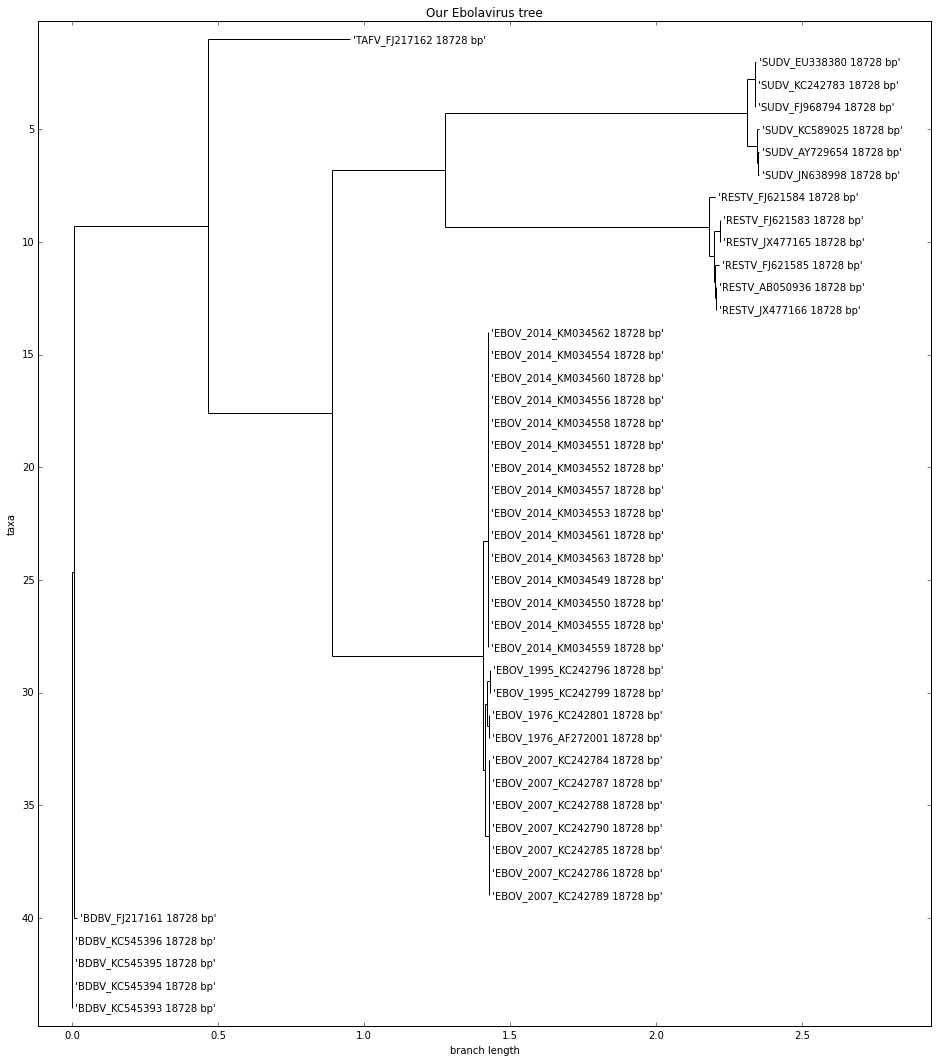

In [4]:
import matplotlib.pyplot as plt
from Bio import Phylo
%matplotlib inline
my_ebola_tree = Phylo.read('my_ebola.nex', 'nexus')
my_ebola_tree.name = 'Our Ebolavirus tree'

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

## RAxML with Biopython

In [5]:
import random
import sys
from Bio.Phylo.Applications import RaxmlCommandline
raxml_cline = RaxmlCommandline(sequences='trim.fasta',
                               model='GTRGAMMA', name='biopython',
                               num_replicates='10',
                               parsimony_seed=random.randint(0, sys.maxint),
                               working_dir=os.getcwd() + os.sep + 'bp_rx')
print(raxml_cline)
try:
    os.mkdir('bp_rx')
except OSError:
    shutil.rmtree('bp_rx')
    os.mkdir('bp_rx')
out, err = raxml_cline()

raxmlHPC -m GTRGAMMA -n biopython -p 7472159317643208929 -s trim.fasta -w /home/tra/bioinf-python/notebooks/05_Phylo/bp_rx -N 10


In [6]:
from Bio import Phylo
biopython_tree = Phylo.read('bp_rx/RAxML_bestTree.biopython', 'newick')

In [7]:
print(biopython_tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.000194160545644)
            Clade(branch_length=0.00750724471696)
                Clade(branch_length=0.00849916806279, name='BDBV_FJ217161')
                Clade(branch_length=0.461045620814)
                    Clade(branch_length=0.488266643512, name='TAFV_FJ217162')
                    Clade(branch_length=0.428082521767)
                        Clade(branch_length=0.387350036187)
                            Clade(branch_length=1.04377599779)
                                Clade(branch_length=0.0335449613519)
                                    Clade(branch_length=0.00192035471481)
                                        Clade(branch_length=0.00426943306622, name='SUDV_JN638998')
                                        Clade(branch_length=0.00304784447369, name='SUDV_AY729654')
                                    Clade(branch_length=0.00498128112027, name='SUDV_KC589025')
                   